<a href="https://colab.research.google.com/github/Matheus-Homem/Matheus-Homem/blob/main/Superstore_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

## 0.1 Libraries

In [37]:
import pandas as pd
import numpy as np
!pip install inflection
from inflection import underscore
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
#import datetime
#from scipy import stats
#from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
#!pip install boruta
#from boruta import BorutaPy
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.linear_model import LinearRegression, Lasso
#!pip install xgboost
#import xgboost as xgb
#import random

In [38]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 0.2 Loading Data

In [39]:
# Importing data from .csv
link = 'https://github.com/Matheus-Homem/favorita-grocery-sales/blob/main/data/train.csv?raw=true'
df = pd.read_csv(link)

In [40]:
# One random row from dataset
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
5986,5987,CA-2017-163776,19/07/2017,25/07/2017,Standard Class,JS-16030,Joy Smith,Consumer,United States,Hattiesburg,Mississippi,39401.0,South,OFF-ST-10002485,Office Supplies,Storage,Rogers Deluxe File Chest,87.92


## 0.3 Helper Functions

In [41]:
def plot1(xsize,ysize,nrows,ncols,list_of_cols):
  plt.figure(figsize=(xsize,ysize))
  i = 1
  for cols in list_of_cols:
    plt.subplot(nrows,ncols,i)
    sns.stripplot(x=cols,y='sales',data=df1)
    plt.subplot(nrows,ncols,i+1)
    sns.kdeplot(x='sales',hue=cols,data=df1)
    i += 2
  plt.show()

# 1. Data Description

## 1.1. Rename Columns

In [42]:
# Security Copy 1:
df1 = df.copy()

In [43]:
# Trasforming column names in Camel Case
new_cols = df1.columns
new_cols = list(map(lambda x: x.replace(" ", "").replace("-", ""), new_cols))

In [44]:
# Function to transform CamelCase to SnakeCase
df1.columns = list(map(lambda x: underscore(x),new_cols))

# Printing renamed columns
df1.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

## 1.2. Data Dimensions

In [45]:
print('Number of Rows: ',df1.shape[0])
print('Number of Columns: ',df1.shape[1])

Number of Rows:  9800
Number of Columns:  18


## 1.3. Data Types

In [46]:
# Changing order and ship data to datetime dtype
df1.order_date = pd.to_datetime(df1.order_date)
df1.ship_date = pd.to_datetime(df1.ship_date)
df1.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
dtype: object

## 1.4. NA Checking

In [47]:
# NA count for each column
df1.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

## 1.5. Fillout NA

In [48]:
print('Missing postal codes in Burlington City: '+ str(df1[df1['city']=='Burlington']['postal_code'].isna().sum()))
print('Total postal codes in Burlington City: '+ str(df1[df1['city']=='Burlington'].shape[0]))
print('Most frequent postal code in Burlington City: ' + str(df1[df1['city']=='Burlington']['postal_code'].value_counts().index[0]))

Missing postal codes in Burlington City: 11
Total postal codes in Burlington City: 25
Most frequent postal code in Burlington City: 27217.0


In [49]:
# Replacing values with the most frequent value
df1['postal_code'] = df1['postal_code'].apply(lambda x: 27217.0 if math.isnan(x) else x)

## 1.6. Change Types

In [50]:
# Turning categorical columns in object dtype
df1['row_id'] = df1['row_id'].astype(object)
df1['postal_code'] = df1['postal_code'].astype(object)

# Turning sales column in int dtype
df1['sales'] = list(map(lambda x: math.ceil(x),df1['sales']))
df1['sales'] = df1['sales'].astype('int64')

## 1.7. Descriptive Statistical

In [51]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.7.1 Categorical Attributes

In [52]:
cat_attributes.apply(lambda x: x.unique().shape[0])

row_id           9800
order_id         4922
ship_mode           4
customer_id       793
customer_name     793
segment             3
country             1
city              529
state              49
postal_code       626
region              4
product_id       1861
category            3
sub_category       17
product_name     1849
dtype: int64

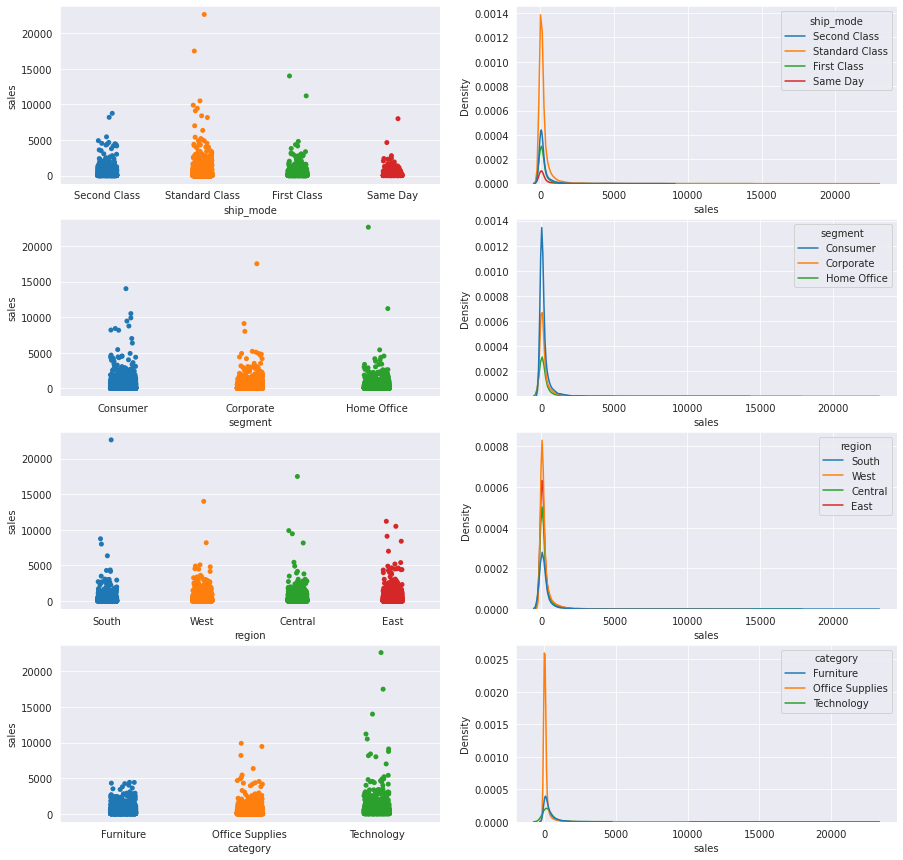

In [53]:
#@title Sales and density of variables with few categories
plot1(15,15,4,2,['ship_mode','segment','region','category'])

### 1.7.2 Numerical Attribute

In [54]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Contacatenate
n = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
n.columns = ['Attributes','Min','Max','Range','Mean','Median','Std','Skew','Kurtosis']

In [55]:
n

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,sales,1.0,22639.0,22638.0,231.165816,55.0,626.59649,12.984268,304.479503


# 2. Feature Engineering

In [56]:
df2 = df1.copy()

## 2.1. Hypothesis Mind Map

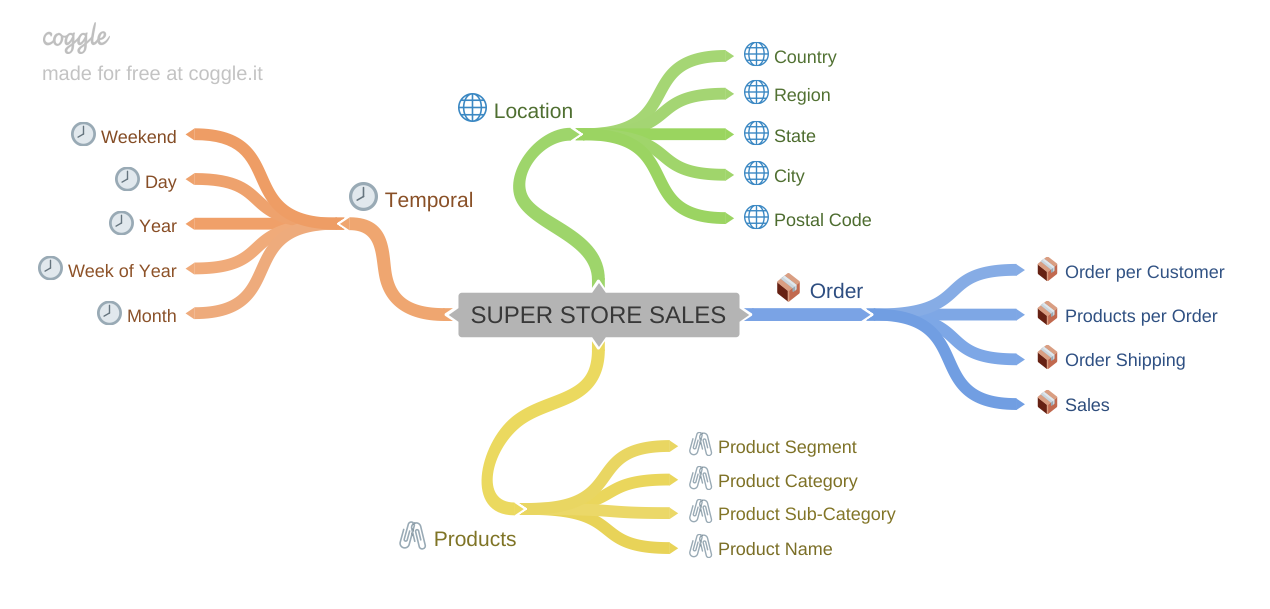

## 2.2. List of Hypothesis

- **Hypothesis 01:** The western region should sell more;

- **Hypothesis 02:** The State of California should sell more;

- **Hypothesis 03:** New York City should sell more;

- **Hypothesis 04:** The Superstore should sell less on weekends;

- **Hypothesis 05:** The Superstore should sell more in the first half of each month;

- **Hypothesis 06:** The Consumer segment should sell more;

- **Hypothesis 07:** The Office Supplies category should sell more;

- **Hypothesis 08:** The Binders sub category should sell more;

- **Hypothesis 09:** The product "Staple envelope" should sell more;

- **Hypothesis 10:** Frequent customers buy more;

- **Hypothesis 11:** Orders with more than one product sell less;

- **Hypothesis 12:** The Standard class shipping sell more;


## 2.3. Feature Engineering